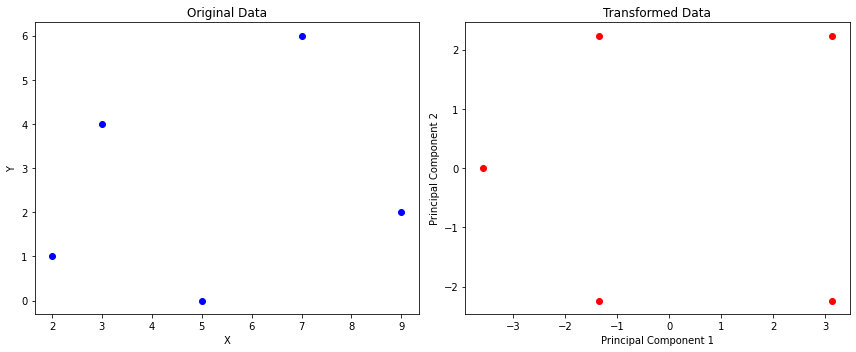

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data matrix
data = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])

# Step 1: Mean normalization
mean = np.mean(data, axis=0)
normalized_data = data - mean

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(normalized_data, rowvar=False)

# Step 3: Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select the top k eigenvectors to form the transformation matrix
k = 2  # Since we want to transform to 2D feature space
transformation_matrix = sorted_eigenvectors[:, :k]

# Step 6: Project the data onto the new feature space
transformed_data = np.dot(normalized_data, transformation_matrix)

# Plotting original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.scatter(data[:, 0], data[:, 1], color='blue')
plt.xlabel('X')
plt.ylabel('Y')

# Plotting transformed data
plt.subplot(1, 2, 2)
plt.title('Transformed Data')
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

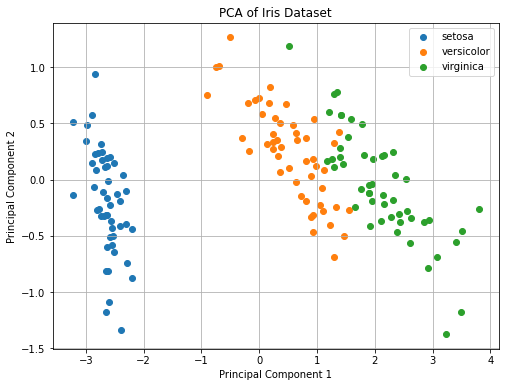

In [2]:
from sklearn.datasets import load_iris

# Step 1: Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

# Step 2: Mean normalization
mean = np.mean(data, axis=0)
normalized_data = data - mean

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(normalized_data, rowvar=False)

# Step 4: Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 5: Sort eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 6: Select the top 2 eigenvectors to form the transformation matrix
k = 2
transformation_matrix = sorted_eigenvectors[:, :k]

# Step 7: Project the data onto the new feature space
transformed_data = np.dot(normalized_data, transformation_matrix)

# Step 8: Plot the scatter plot for samples in the transformed domain
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(transformed_data[target == i, 0], transformed_data[target == i, 1], label=target_name)

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()